In [4]:
words=open("names.txt").read().splitlines()

In [5]:
words

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery',
 'julia'

In [6]:
b={}
for w in words[:2]:
    chs=['<S>'] + list(w) + ['<E>']
    for ch1,ch2 in zip(chs,chs[1:]) :
        bigram=(ch1,ch2)
        
        print(f'Biagram and value : {bigram} and {b.get(bigram,0)+1}')
        b[bigram]=b.get(bigram,0)+1

        


Biagram and value : ('<S>', 'e') and 1
Biagram and value : ('e', 'm') and 1
Biagram and value : ('m', 'm') and 1
Biagram and value : ('m', 'a') and 1
Biagram and value : ('a', '<E>') and 1
Biagram and value : ('<S>', 'o') and 1
Biagram and value : ('o', 'l') and 1
Biagram and value : ('l', 'i') and 1
Biagram and value : ('i', 'v') and 1
Biagram and value : ('v', 'i') and 1
Biagram and value : ('i', 'a') and 1
Biagram and value : ('a', '<E>') and 2


In [7]:
sorted(b.items(),key= lambda kv : -kv[1])

[(('a', '<E>'), 2),
 (('<S>', 'e'), 1),
 (('e', 'm'), 1),
 (('m', 'm'), 1),
 (('m', 'a'), 1),
 (('<S>', 'o'), 1),
 (('o', 'l'), 1),
 (('l', 'i'), 1),
 (('i', 'v'), 1),
 (('v', 'i'), 1),
 (('i', 'a'), 1)]

In [8]:
import torch
import torch.nn as nn


c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
N=torch.zeros((27,27),dtype=torch.int32)

In [10]:
chars=sorted(list(set("".join(words))))
stoi={s: i+1 for i,s in enumerate(chars)}
stoi['.']=0


itos={i:s for s,i in stoi.items()}
encode= lambda s : [stoi[c] for c in s] #-->int
decode=lambda i :  "".join([itos[x] for x in i  ])


itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [11]:

for w in words[:5]:
    print(w)
    chs=['.'] + list(w) + ["."]
    for ch1,ch2 in zip(chs,chs[1:]) :
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        print(f'{ix1} and {ix2}')
        N[ix1,ix2]+=1
        print(f' Matrix value {N[ix1,ix2]}\n')



emma
0 and 5
 Matrix value 1

5 and 13
 Matrix value 1

13 and 13
 Matrix value 1

13 and 1
 Matrix value 1

1 and 0
 Matrix value 1

olivia
0 and 15
 Matrix value 1

15 and 12
 Matrix value 1

12 and 9
 Matrix value 1

9 and 22
 Matrix value 1

22 and 9
 Matrix value 1

9 and 1
 Matrix value 1

1 and 0
 Matrix value 2

ava
0 and 1
 Matrix value 1

1 and 22
 Matrix value 1

22 and 1
 Matrix value 1

1 and 0
 Matrix value 3

isabella
0 and 9
 Matrix value 1

9 and 19
 Matrix value 1

19 and 1
 Matrix value 1

1 and 2
 Matrix value 1

2 and 5
 Matrix value 1

5 and 12
 Matrix value 1

12 and 12
 Matrix value 1

12 and 1
 Matrix value 1

1 and 0
 Matrix value 4

sophia
0 and 19
 Matrix value 1

19 and 15
 Matrix value 1

15 and 16
 Matrix value 1

16 and 8
 Matrix value 1

8 and 9
 Matrix value 1

9 and 1
 Matrix value 2

1 and 0
 Matrix value 5



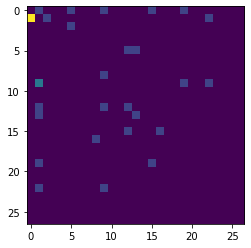

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

In [13]:
len(words)

32033

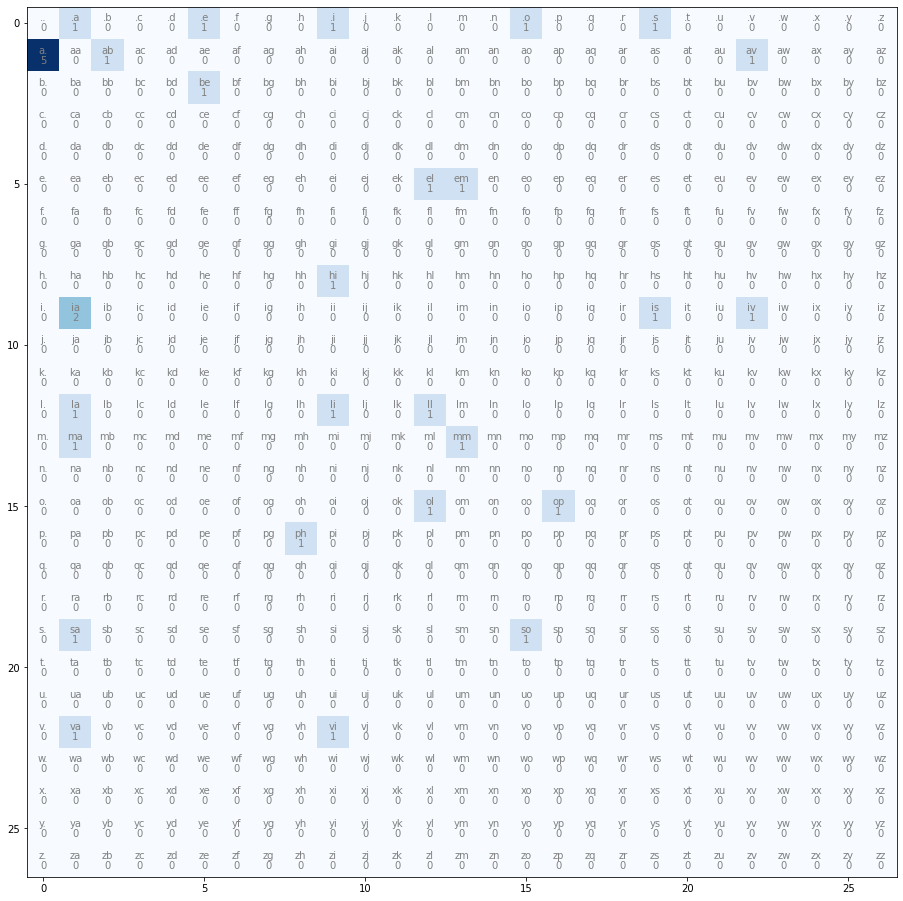

In [14]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(len(N)):
    for j in range(27):
        value=itos[i] + itos[j]
        plt.text(j,i, value, ha="center", va="bottom", color='gray')
        plt.text(j,i, N[i, j].item(), ha="center", va="top", color='gray')


In [15]:
N.sum(0)[0]

tensor(5)

In [16]:
p=N[0].float()
p=p/p.sum() 
p

tensor([0.0000, 0.2000, 0.0000, 0.0000, 0.0000, 0.2000, 0.0000, 0.0000, 0.0000,
        0.2000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2000, 0.0000, 0.0000,
        0.0000, 0.2000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])

In [17]:
g=torch.Generator().manual_seed(2147483647)
p=torch.rand(3,generator=g)
p=p/p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [18]:
torch.multinomial(p,num_samples=1,replacement=True, generator=g)

tensor([1])

In [19]:
P=(N+1).float()
P/=torch.sum(P, dim=1,keepdim=True) #broadcasting


In [20]:
g=torch.Generator().manual_seed(2147483647)
for i in range(10):
    out=[]
    ix=0
    while True :
        p=P[ix]
        ix=torch.multinomial(p,num_samples=1,replacement=True, generator=g).item()

        out.append(itos[ix])
        if ix==0 :
            break
    print("".join(out))
            

qvra.
xxbqrqmyqwuznivakukoscjvche.
qnoymszduqkascesjpgjdgifvkekfkrspkwnirghiywlu.
iccx.
bellzucjnjofovivqggqrjr.
cfbha.
jsloolb.
xtxwbomknuusxdgzfexhwqpkdpdnwzvjyxsqjforqqpfxssvjfoufhvwfhlruyyosvcvvqpfcbydjcothjagkhqnnpqmmllamqdqy.
gszpw.
zlfiihnakgzzuulryvprufuawauscbmwvkmqypugrsegpshhmmwabplrjdvbgngvojifxhkwdltrdkwnaczyknqv.


In [21]:
log_likehood=0
n=0
for w in words:
    chs=['.'] + list(w) + ["."]
    for ch1,ch2 in zip(chs,chs[1:]) :
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        prob=P[ix1,ix2]
        n+=1
        log_likehood+=-torch.log(prob).item()
print(log_likehood/n)



3.229852427079668


In [22]:
#create training set for thr model

xs,ys=[],[]

for w in words:
    chs=['.'] + list(w) + ["."]
    for ch1,ch2 in zip(chs,chs[1:]) :
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs=torch.tensor(xs)
ys=torch.tensor(ys)

In [23]:
import torch.nn.functional as F
xenc=F.one_hot(xs, num_classes=27).float()
yenc=F.one_hot(ys, num_classes=27).float()


In [24]:
xenc.shape

torch.Size([228146, 27])

In [25]:
#gradient descent
for k in range(50) :
    W=torch.randn((27,27),requires_grad=True)
    logits=(xenc @ W).exp()
    counts=logits.exp()
    prob=counts/counts.sum(1,keepdims=True)

    seed=torch.arange(ys.shape[0])
    loss=-prob[seed,ys].log().mean()+0.1*(W**2).mean() ##Regularization term(Second part)
    
    W.grad=None
    loss.backward()

    W.data+=-50*W.grad ##Learning Rate





In [40]:
import matplotlib.pyplot as plt
import numpy as np
 
l=[]
def getPositionEncoding(seq_len, d, n=10000):
    P = np.zeros((seq_len, d))
    for k in range(seq_len):
        for i in range(int(d/2)):
            denominator = np.power(n, 2*i/d)
            P[k, 2*i] = np.sin(k/denominator)
            P[k, 2*i+1] = np.cos(k/denominator)

    return P
 
P = getPositionEncoding(seq_len=10, d=2, n=10000)
print(P)

[[ 0.          1.        ]
 [ 0.84147098  0.54030231]
 [ 0.90929743 -0.41614684]
 [ 0.14112001 -0.9899925 ]
 [-0.7568025  -0.65364362]
 [-0.95892427  0.28366219]
 [-0.2794155   0.96017029]
 [ 0.6569866   0.75390225]
 [ 0.98935825 -0.14550003]
 [ 0.41211849 -0.91113026]]
[]


In [139]:
Q=np.zeros((P.shape[0],P.shape[1]+2))
Q[:,2:]=P 

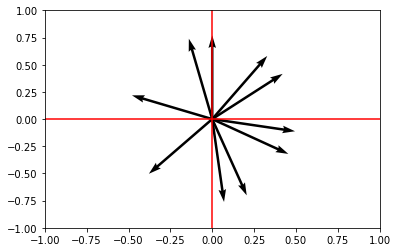

In [149]:
 
X,Y,U,V=zip(*Q) 
ax=plt.gca()
plt.xlim((-1,1))
plt.ylim((-1,1))
ax.axhline(y=0, color='red')
ax.axvline(x=0, color='red')
ax.quiver(X,Y,U,V, scale=4)

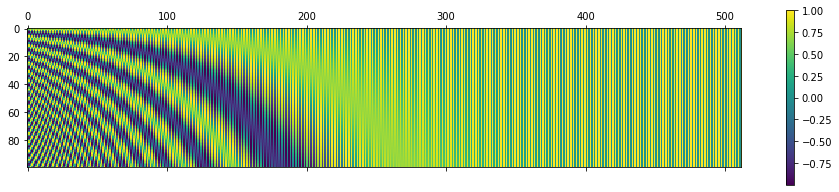

In [34]:
cax=plt.matshow(P)
plt.gcf().colorbar(cax)

In [35]:
def fun(x) :
    return np.sin(x)


N=1000
a=0
b=np.pi
xrand=b*np.random.random_sample((N))-a

integral=(b-a)/(N) * np.sum(fun(xrand),axis=0)

(array([ 0.84370665,  0.84370665,  0.5624711 ,  0.28123555,  1.40617776,
         1.1249422 ,  1.1249422 ,  2.24988441,  2.81235551,  2.81235551,
         3.93729772,  3.65606217,  6.46841768,  7.31212433,  8.43706654,
         8.71830209, 11.81189315, 10.9681865 , 12.37436425,  7.03088878,
        11.5306576 , 12.0931287 , 13.49930646, 14.34301311, 11.24942205,
         9.56200874, 12.0931287 , 13.21807091, 10.68695095,  9.56200874,
         8.71830209, 11.5306576 ,  9.28077319,  6.18718213,  5.62471102,
         4.49976882,  3.37482661,  3.93729772,  3.09359106,  2.53111996,
         2.24988441,  1.68741331,  1.40617776,  1.96864886,  0.5624711 ,
         0.28123555,  0.84370665,  0.        ,  0.28123555,  0.5624711 ]),
 array([1.91614093, 1.91969667, 1.9232524 , 1.92680814, 1.93036388,
        1.93391962, 1.93747536, 1.9410311 , 1.94458683, 1.94814257,
        1.95169831, 1.95525405, 1.95880979, 1.96236553, 1.96592126,
        1.969477  , 1.97303274, 1.97658848, 1.98014422, 1.983699

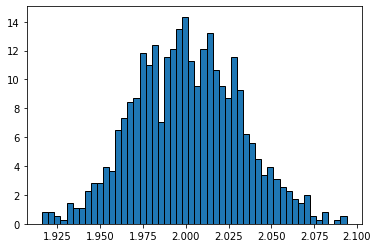

In [36]:
hist=[]
for i in range(N) :
    xrand=b*np.random.random_sample((N))-a
    integral=(b-a)/(N) * np.sum(fun(xrand),axis=0)
    hist.append(integral)

plt.hist(hist,bins=50,density=True,ec='black')

